# Basketball Shot Detection Training with YOLOv8

This notebook trains a YOLOv8 model to detect basketball shots using custom dataset.

**Classes:**
- Green Team Player
- Red Team Player  
- Rim
- Basketball

**Setup Instructions:**
1. Enable GPU runtime in Colab (Runtime > Change runtime type > Hardware accelerator: GPU)
2. Upload your dataset folder `uball.v3-v2.yolov11` to Colab
3. Run all cells sequentially

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. GPU Setup and Library Installation

In [2]:
# Check GPU availability
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

CUDA available: True
CUDA device count: 1
CUDA device name: Tesla T4
CUDA version: 12.4


In [3]:
# Install required packages
!pip install ultralytics>=8.3.0
!pip install cvzone==1.5.6
!pip install filterpy==1.4.5
!pip install matplotlib>=3.6.0
!pip install numpy>=1.26.0
!pip install opencv-python>=4.9.0
!pip install Pillow>=9.0.0
!pip install PyYAML>=6.0
!pip install scipy>=1.9.0
!pip install tqdm>=4.66.0

## 2. Dataset Setup

Upload your `uball.v3-v2.yolov11` folder to Colab using the file browser on the left.

In [4]:
# Verify dataset structure
import os

dataset_path = '/content/drive/MyDrive/Uball-shot-detection.v2i.yolov11'
if os.path.exists(dataset_path):
    print("Dataset found!")

    # Check subdirectories
    for split in ['train', 'valid', 'test']:
        images_path = os.path.join(dataset_path, split, 'images')
        labels_path = os.path.join(dataset_path, split, 'labels')

        if os.path.exists(images_path):
            img_count = len(os.listdir(images_path))
            print(f"{split} images: {img_count}")

        if os.path.exists(labels_path):
            label_count = len(os.listdir(labels_path))
            print(f"{split} labels: {label_count}")
else:
    print("Dataset not found! Please upload the uball.v3-v2.yolov11 folder to /content/")

Dataset found!
train images: 248
train labels: 248
valid images: 35
valid labels: 35
test images: 18
test labels: 18


In [5]:
# Create dataset configuration file
config_yaml = '''
train: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/train/images
val: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/valid/images
test: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/test/images

nc: 2
names: ['Basketball', 'Basketball Hoop']
'''

with open('/content/config.yaml', 'w') as f:
    f.write(config_yaml)

print("Configuration file created successfully!")
print("\nConfig contents:")
with open('/content/config.yaml', 'r') as f:
    print(f.read())

Configuration file created successfully!

Config contents:

train: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/train/images
val: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/valid/images
test: /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/test/images

nc: 2
names: ['Basketball', 'Basketball Hoop']



## 3. Utility Functions

In [6]:
# Device selection utility function
def get_device():
    """Automatically select best available device"""
    if torch.cuda.is_available():
        device = 'cuda'
    elif torch.backends.mps.is_available():
        device = 'mps'
    else:
        device = 'cpu'
    print(f"Using device: {device}")
    return device

device = get_device()

Using device: cuda


## 4. Model Training

In [7]:
# Download pre-trained YOLOv11 model
from ultralytics import YOLO

# Load pre-trained YOLOv11n model (nano - fastest)
model = YOLO('yolo11m.pt')

print("Pre-trained model loaded successfully!")

Pre-trained model loaded successfully!


In [8]:
# Train the model
print("Starting training...")
print("This will take some time depending on your GPU and dataset size.")
print("Training progress will be shown below.")

# Training parameters
results = model.train(
    data='/content/config.yaml',
    epochs=100,              # Number of training epochs
    imgsz=640,              # Input image size
    batch=16,               # Batch size (adjust based on GPU memory)
    device=device,          # Use GPU if available
    project='basketball_training',  # Project name
    name='run1',            # Run name
    save=True,              # Save model checkpoints
    plots=True,             # Generate training plots
    cache=True,             # Cache images for faster training
    amp=True,               # Automatic Mixed Precision training
    workers=2               # Number of worker threads
)

print("Training completed!")

Starting training...
This will take some time depending on your GPU and dataset size.
Training progress will be shown below.
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run12, nbs=64, nms=False, opset=None, o

train: Scanning /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/train/labels.cache... 248 images, 0 backgrounds, 0 corrupt: 100%|██████████| 248/248 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 248/248 [04:38<00:00,  1.12s/it]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.1±0.0 MB/s, size: 74.0 KB)


val: Scanning /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 35/35 [00:15<00:00,  2.30it/s]


Plotting labels to basketball_training/run12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to basketball_training/run12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.96G      2.793      11.23      1.341         22        640: 100%|██████████| 16/16 [00:10<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         35         55      0.681       0.55      0.531       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.19G      1.434      1.718     0.9076         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         35         55      0.109      0.486       0.12     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.23G      1.452      1.274     0.9235         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.24G      1.506      1.108     0.9135         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.26G      1.422     0.9539     0.8965         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.26G      1.434     0.9823     0.9132         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.21G      1.376     0.9636      0.895         22        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.21G      1.416     0.8048     0.8953         17        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.21G      1.276     0.7198     0.8843         17        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.22G      1.339     0.9059     0.8778         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.22G      1.332     0.8034     0.8924         11        640: 100%|██████████| 16/16 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.21G      1.297     0.7915     0.8645         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         35         55          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.22G      1.289      0.782     0.8636          8        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         35         55      0.498      0.586      0.497      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.22G      1.312     0.7938     0.8954         10        640: 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         35         55      0.739      0.611      0.631      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.21G      1.286     0.7919     0.8771         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         35         55       0.51      0.357      0.271      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.21G      1.268     0.7671     0.8778         19        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.533      0.675      0.526      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.21G      1.325     0.7875      0.875         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         35         55      0.953        0.7      0.781      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.21G      1.189     0.6603     0.8545         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         35         55      0.883      0.773      0.829      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.21G      1.188     0.6923     0.8729         17        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         35         55      0.939       0.75      0.792      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.21G      1.215     0.7106     0.8699         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         35         55      0.979        0.8      0.842      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.21G      1.118     0.6364     0.8503         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         35         55      0.812      0.823      0.845      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.21G      1.207     0.6456     0.8748         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         35         55      0.933      0.775      0.803      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.21G      1.228       0.68     0.8597         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.803      0.816      0.791      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       8.2G       1.27     0.6726     0.8818         19        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         35         55       0.86       0.82      0.821      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.21G      1.206     0.6555     0.8656         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         35         55      0.986        0.8      0.853      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.21G      1.145     0.6281     0.8573         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         35         55      0.794      0.825      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.21G      1.157     0.6503     0.8823         16        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         35         55      0.885      0.775       0.79      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.21G      1.146     0.6466     0.8679         10        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         35         55      0.881      0.775        0.8      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.21G      1.116     0.6213     0.8596         23        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         35         55      0.974       0.75      0.835       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.21G      1.065     0.5972      0.861         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.883      0.821      0.865      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.21G      1.039     0.6043     0.8551         21        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55      0.864      0.875      0.852      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.21G      1.067     0.5858     0.8512         26        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         35         55      0.811      0.866      0.859      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.2G      1.077     0.6436     0.8438         10        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         35         55       0.95      0.761      0.823       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       8.2G       1.11     0.6232     0.8587         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         35         55      0.915      0.762      0.792      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.21G      1.084     0.5808     0.8348         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.964      0.813      0.848      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.21G        1.1     0.5917     0.8609         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.959      0.825      0.832      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.21G      1.066     0.5772     0.8661         20        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         35         55      0.925      0.825      0.857       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.21G      1.029     0.5502     0.8294         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.984      0.775      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.21G      1.086     0.5603      0.852         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55       0.92       0.85      0.912      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.21G      1.078     0.5864     0.8421         16        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55      0.974        0.8      0.887      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.22G      1.023     0.6114     0.8575         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         35         55       0.96      0.775      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       8.2G      1.042     0.5532     0.8345         20        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55      0.961      0.793      0.863      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.21G       1.06     0.5856     0.8616         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.997      0.775      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.21G      1.027     0.5747     0.8458         17        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         35         55      0.992      0.867      0.897       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.21G     0.9899     0.5448     0.8412         20        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         35         55      0.948      0.825      0.886       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.21G      1.008     0.5529     0.8614         23        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         35         55      0.885      0.775      0.821      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.21G      1.043     0.5753     0.8485          9        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55      0.861      0.825      0.849      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.22G      1.001      0.532     0.8425         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         35         55      0.836      0.836      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.21G      1.002     0.5124     0.8405         16        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         35         55       0.82      0.825      0.853      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.22G      1.067     0.5454     0.8476         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         35         55      0.879      0.844      0.856      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       8.2G     0.9344     0.5104     0.8384         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         35         55      0.836      0.825      0.854      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.21G      1.013     0.5266     0.8381         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         35         55      0.989        0.8      0.875      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.21G     0.9943     0.5034     0.8318         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         35         55      0.896      0.775      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.21G     0.9966      0.519       0.84         20        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         35         55      0.866      0.795      0.833      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.21G      1.049     0.5276     0.8358         22        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55       0.82      0.825       0.85      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.21G     0.9882     0.5114     0.8264         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         35         55      0.817       0.85      0.861      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.21G     0.9469     0.4795     0.8322         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.869       0.85      0.875       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.21G     0.9021      0.491     0.8149          8        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55      0.905        0.8      0.865      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.22G     0.9854     0.5042     0.8373         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55       0.88       0.85      0.881      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       8.2G     0.9691     0.5139      0.831         21        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         35         55      0.846       0.85      0.849       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       8.2G      1.016     0.5162     0.8494          8        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         35         55       0.94      0.889      0.909      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.21G       1.02     0.4888     0.8282         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55      0.905        0.9      0.897      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.21G      0.991     0.5069     0.8442         23        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         35         55      0.869       0.82      0.872       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.22G     0.9113     0.4457     0.8348         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         35         55      0.957      0.792      0.855      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.21G     0.9986     0.4982     0.8276         21        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         35         55      0.905       0.85      0.864      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.21G      0.895     0.4601     0.8196         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.931       0.85       0.87      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.21G     0.9719     0.4649     0.8425         23        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55      0.899      0.875      0.889      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.21G     0.9222     0.4527     0.8321         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         35         55      0.884      0.875      0.852      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       8.2G      0.933     0.4619     0.8293         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.887      0.873      0.862      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       8.2G     0.9047     0.4645     0.8507         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         35         55      0.903       0.85      0.881      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.21G     0.9255     0.4694     0.8147         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.964       0.85      0.889      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.21G      0.927     0.4701     0.8233         21        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         35         55      0.842      0.849      0.854      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.21G     0.8688     0.4362     0.8132         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55      0.904       0.85      0.864      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.21G     0.8805     0.4268     0.8276         21        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55      0.907       0.87      0.862      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.21G     0.9111     0.4293     0.8345         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         35         55       0.91      0.868      0.879      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.21G     0.8693     0.4313     0.8198         22        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         35         55      0.961      0.836      0.888      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.21G     0.8496     0.4343     0.8215         22        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         35         55      0.962       0.85      0.894      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       8.2G     0.9009     0.4183     0.8262         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         35         55      0.992      0.825      0.877      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       8.2G     0.8993     0.4422     0.8308         14        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         35         55      0.991      0.825      0.859      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.21G     0.9308     0.4311     0.8303         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         35         55      0.978      0.811      0.885      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.21G     0.8886     0.4475     0.8237         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         35         55       0.97      0.811      0.906      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.21G     0.8666      0.434     0.8196         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.967      0.848      0.903      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.21G     0.9141     0.4564     0.8337         24        640: 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         35         55      0.991      0.816      0.893      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.21G     0.8392      0.429     0.8221         24        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         35         55          1      0.785      0.865      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.21G     0.8855      0.456     0.8346         29        640: 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         35         55      0.902      0.849      0.876      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.21G     0.8662     0.4339     0.8285         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         35         55      0.924       0.85      0.879      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       8.2G     0.8406     0.4025     0.8201         18        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         35         55      0.955      0.824      0.866      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       8.2G     0.8236      0.398     0.8255         13        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         35         55      0.954      0.822       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.21G     0.8003     0.3824      0.824         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.948      0.825      0.883      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.21G     0.8282     0.4157     0.8171         16        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         35         55      0.959       0.85      0.875      0.607


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.21G     0.7749     0.3955     0.8219         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         35         55       0.96      0.849       0.89      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.21G     0.7808     0.3932     0.8334         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         35         55      0.955      0.847       0.89      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.22G       0.79     0.3891     0.8159         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.928       0.85      0.875       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.21G     0.7918     0.4029     0.8167         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.929       0.85      0.863      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.21G     0.7947     0.3852     0.8095         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         35         55      0.931       0.85      0.868      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       8.2G     0.7878      0.375     0.8375         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         35         55      0.906      0.849      0.876      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       8.2G     0.7764     0.3686     0.8289         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         35         55      0.942      0.848      0.885      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.21G     0.7877     0.3788     0.8212         11        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         35         55      0.953      0.848      0.884      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.22G      0.746     0.3601     0.8262         12        640: 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         35         55       0.96      0.849      0.881       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.21G     0.7794     0.3719      0.814         15        640: 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         35         55       0.96      0.849      0.882      0.603



100 epochs completed in 0.289 hours.
Optimizer stripped from basketball_training/run12/weights/last.pt, 40.5MB
Optimizer stripped from basketball_training/run12/weights/best.pt, 40.5MB

Validating basketball_training/run12/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         35         55      0.979      0.811      0.885      0.622
            Basketball         20         20      0.978       0.65      0.775      0.437
       Basketball Hoop         35         35      0.979      0.971      0.994      0.806
Speed: 0.4ms preprocess, 12.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to basketball_training/run12
Training completed!


## 5. Training Results Analysis

Training Results:

📊 Training Curves:


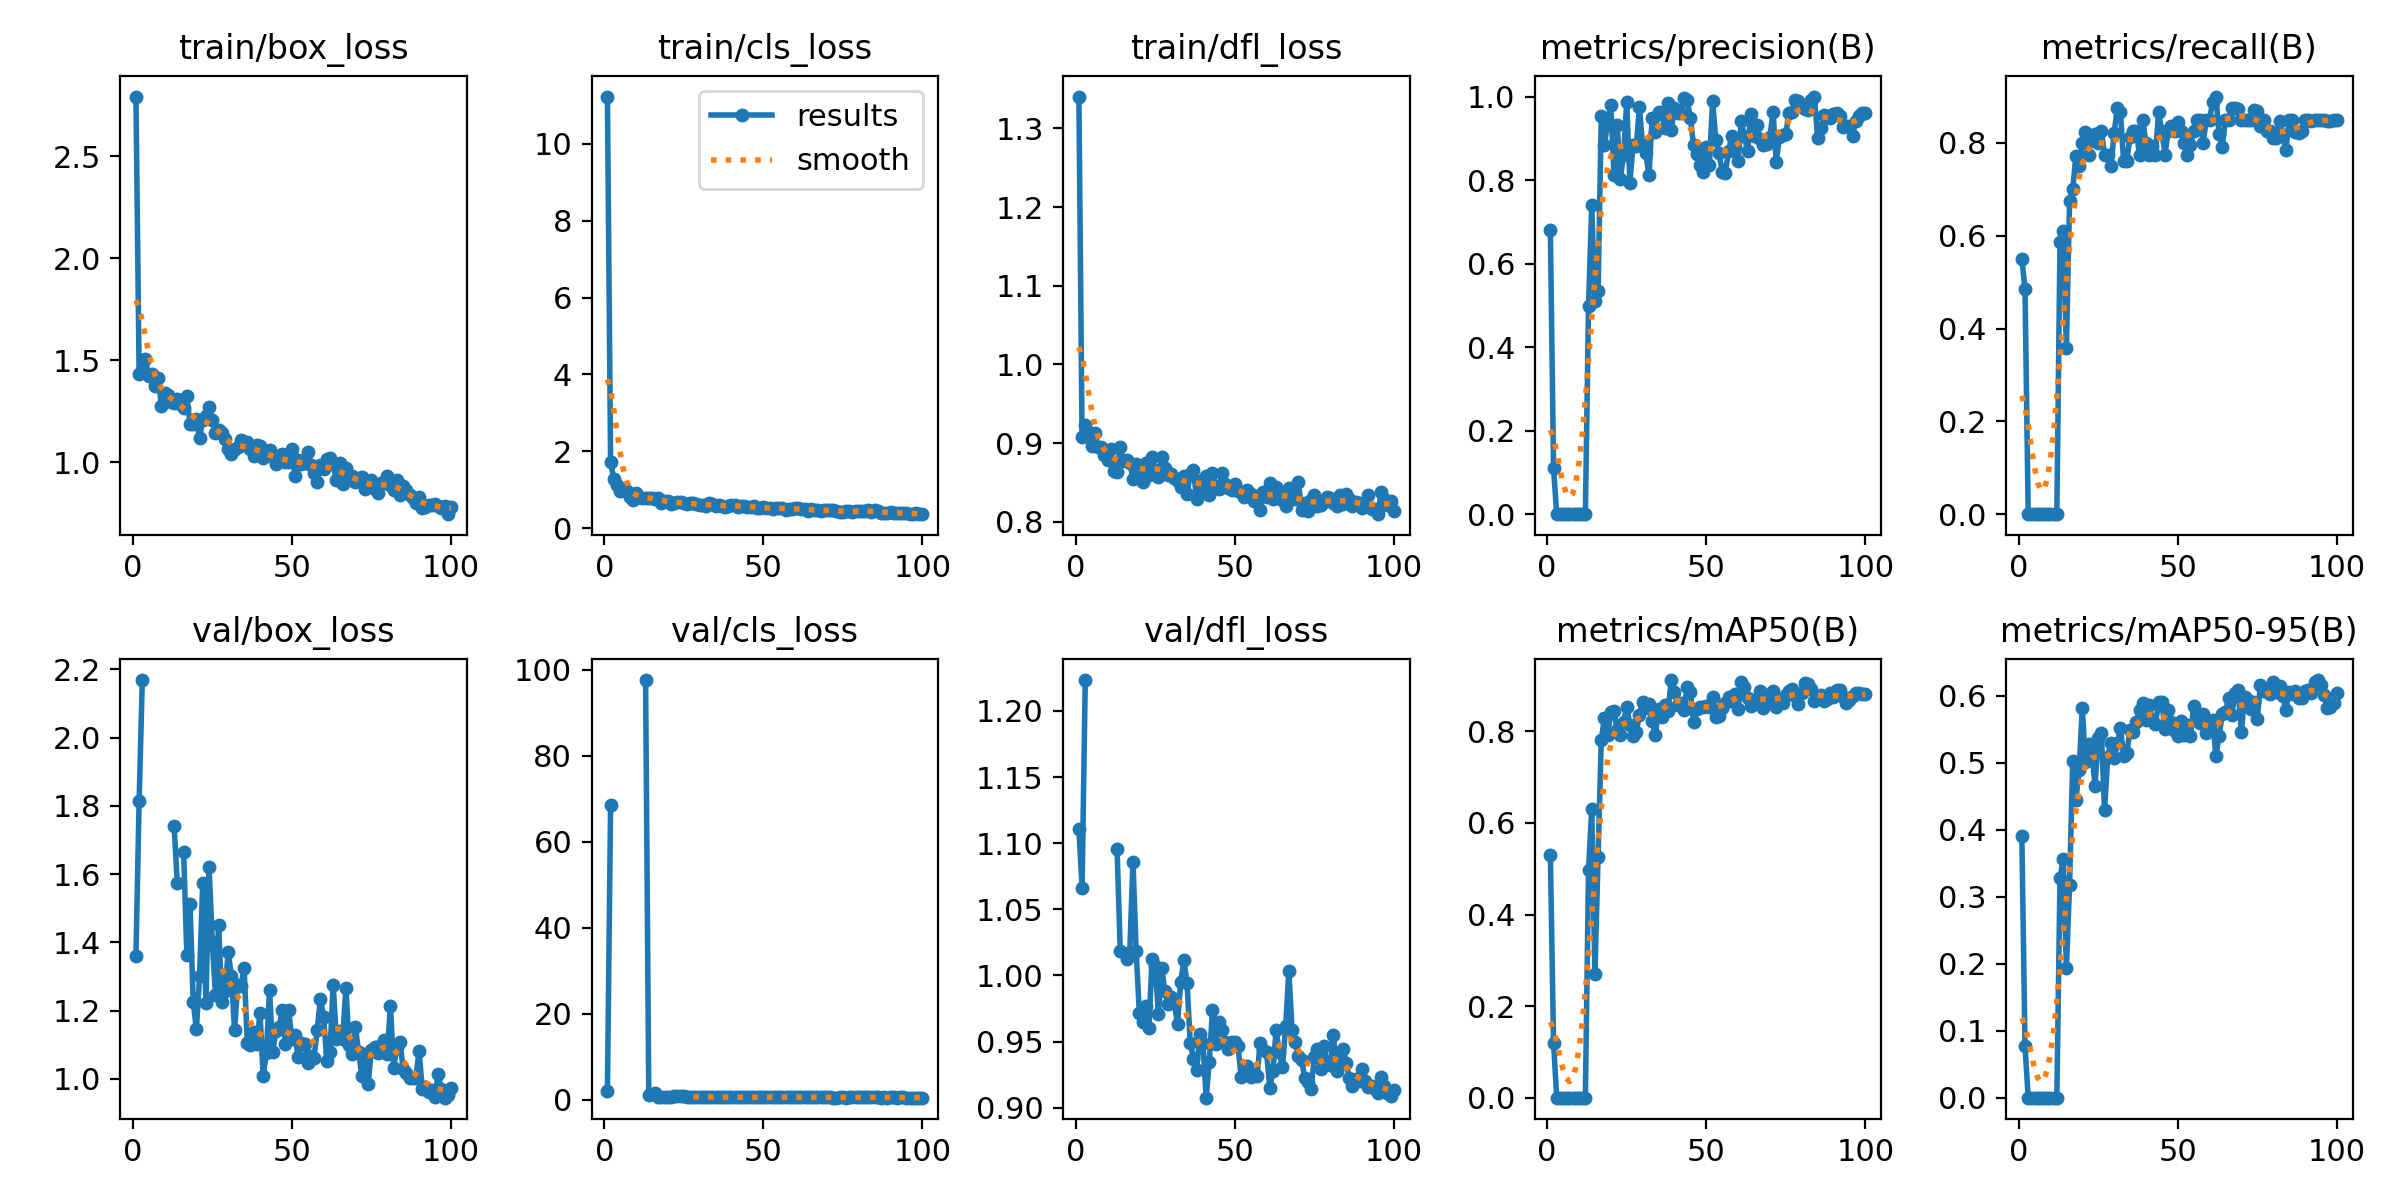


🔍 Confusion Matrix:


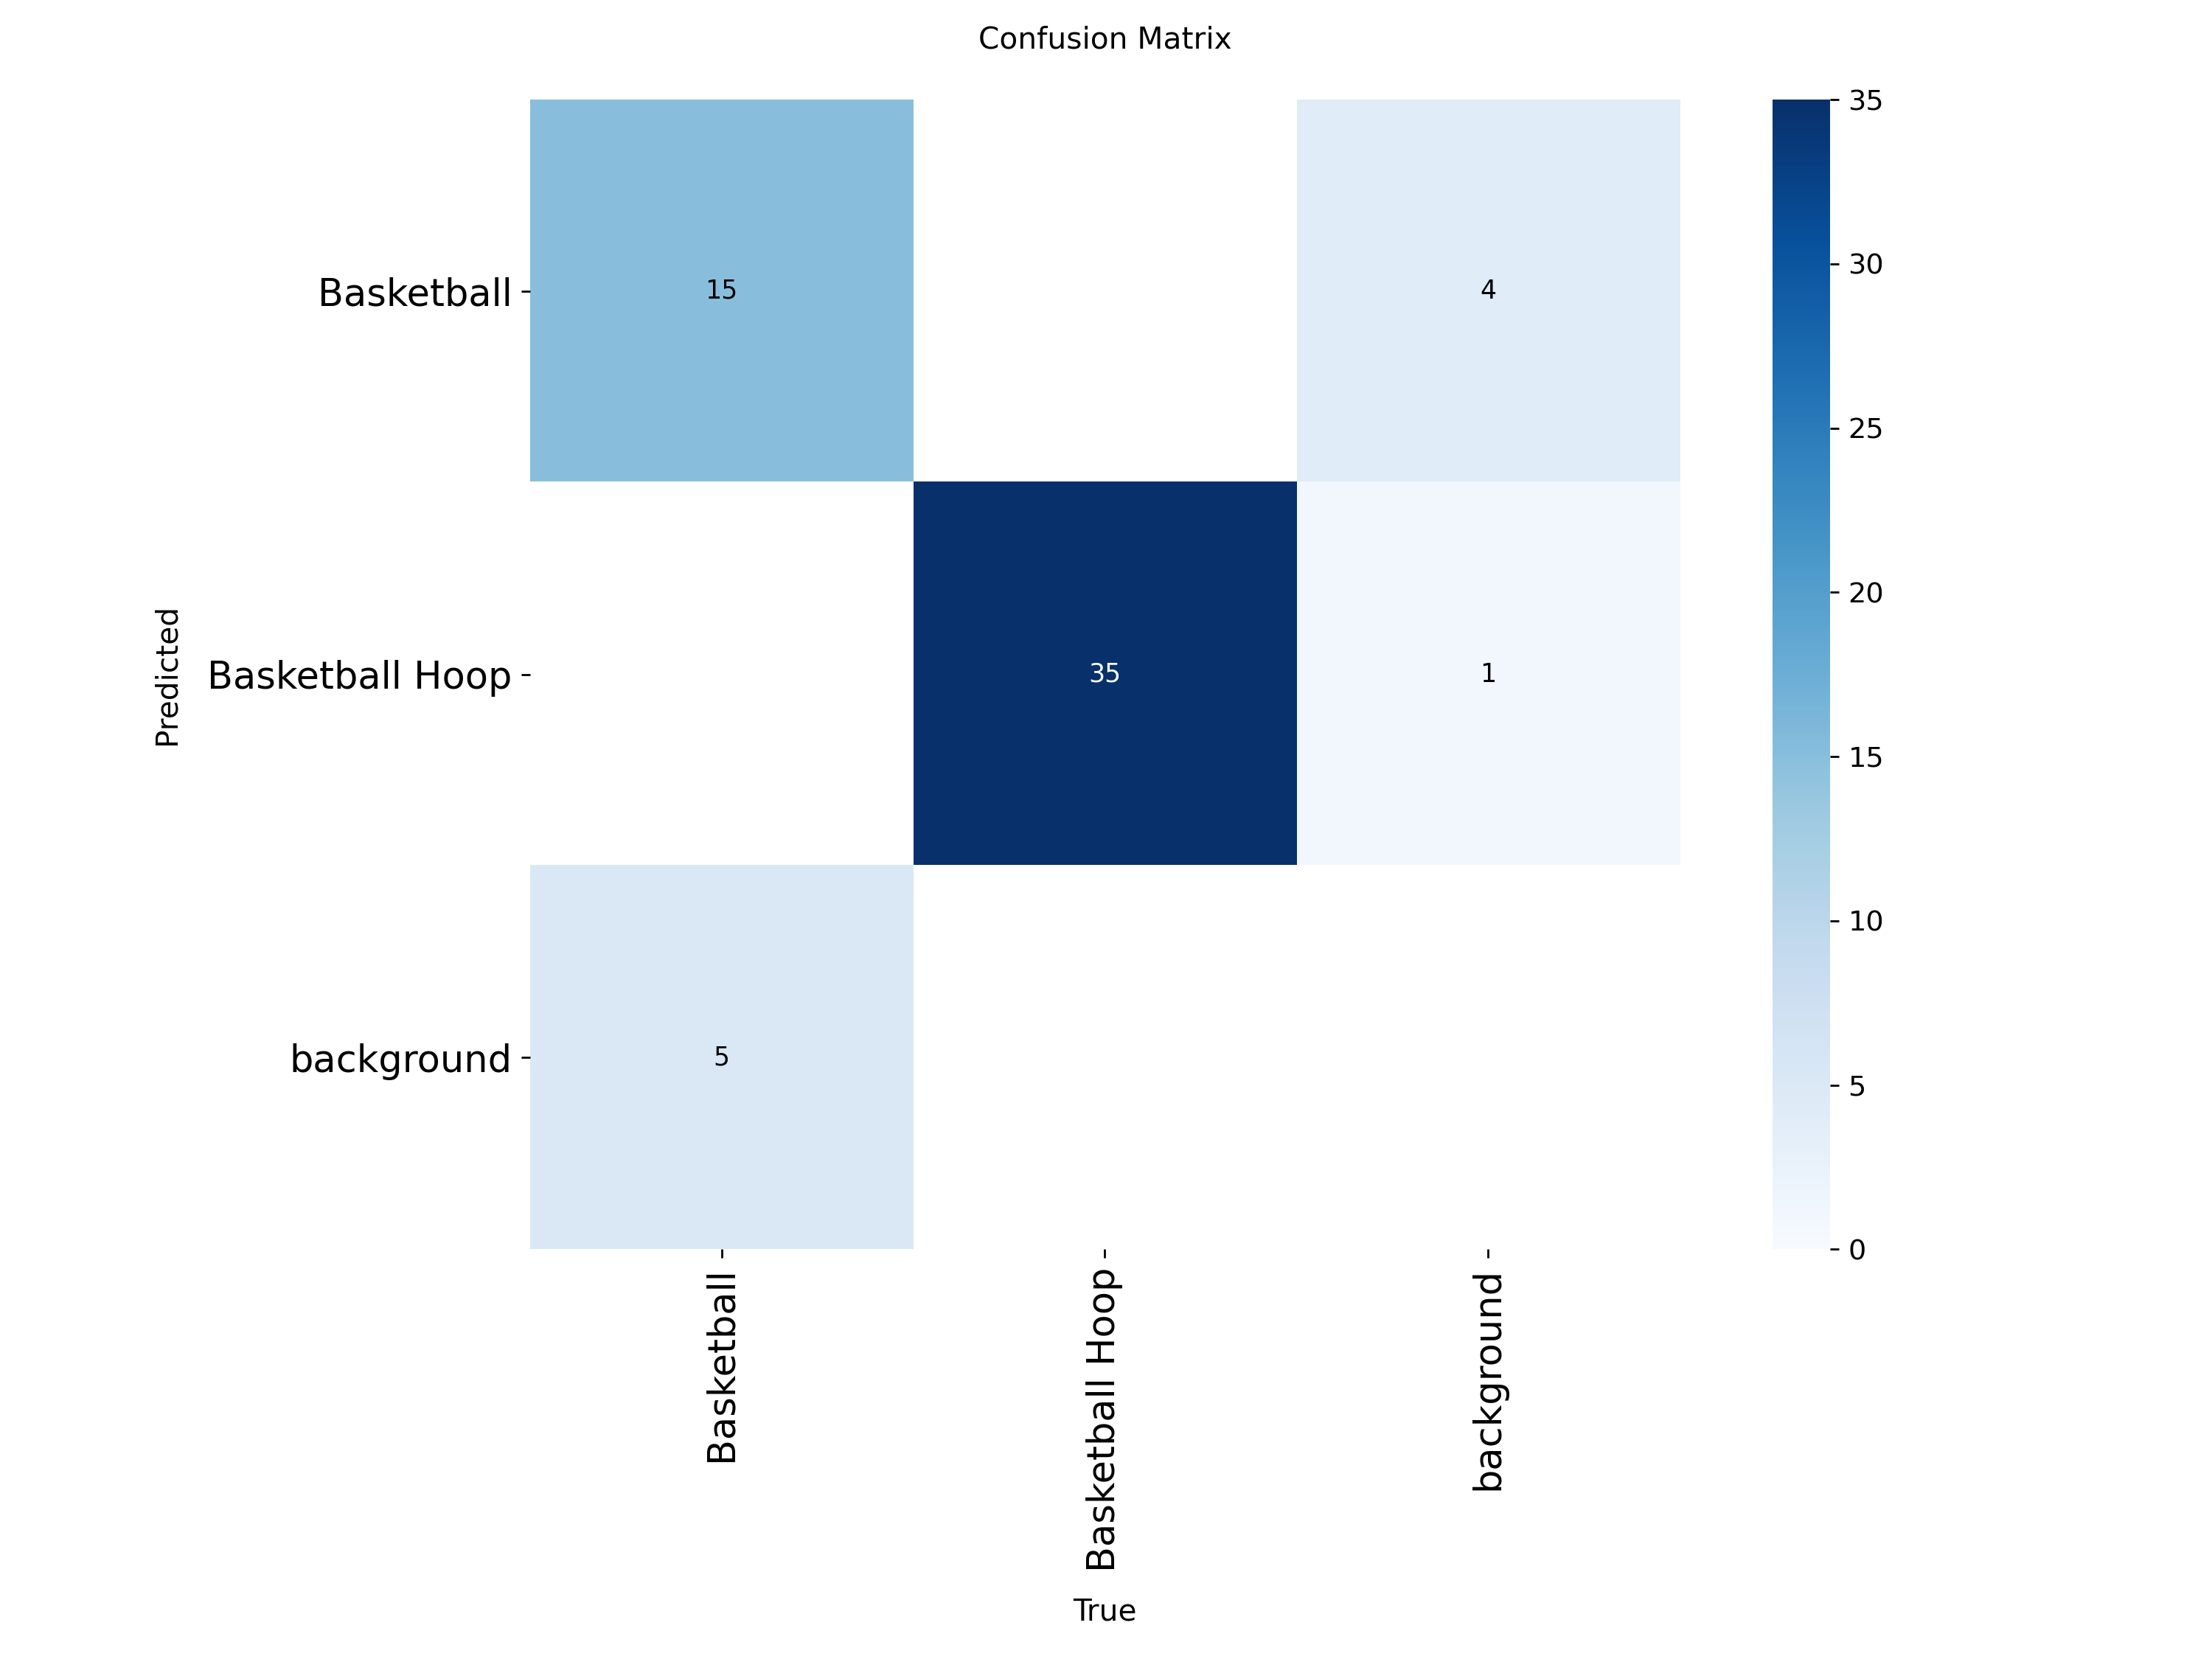


🎯 Validation Predictions:


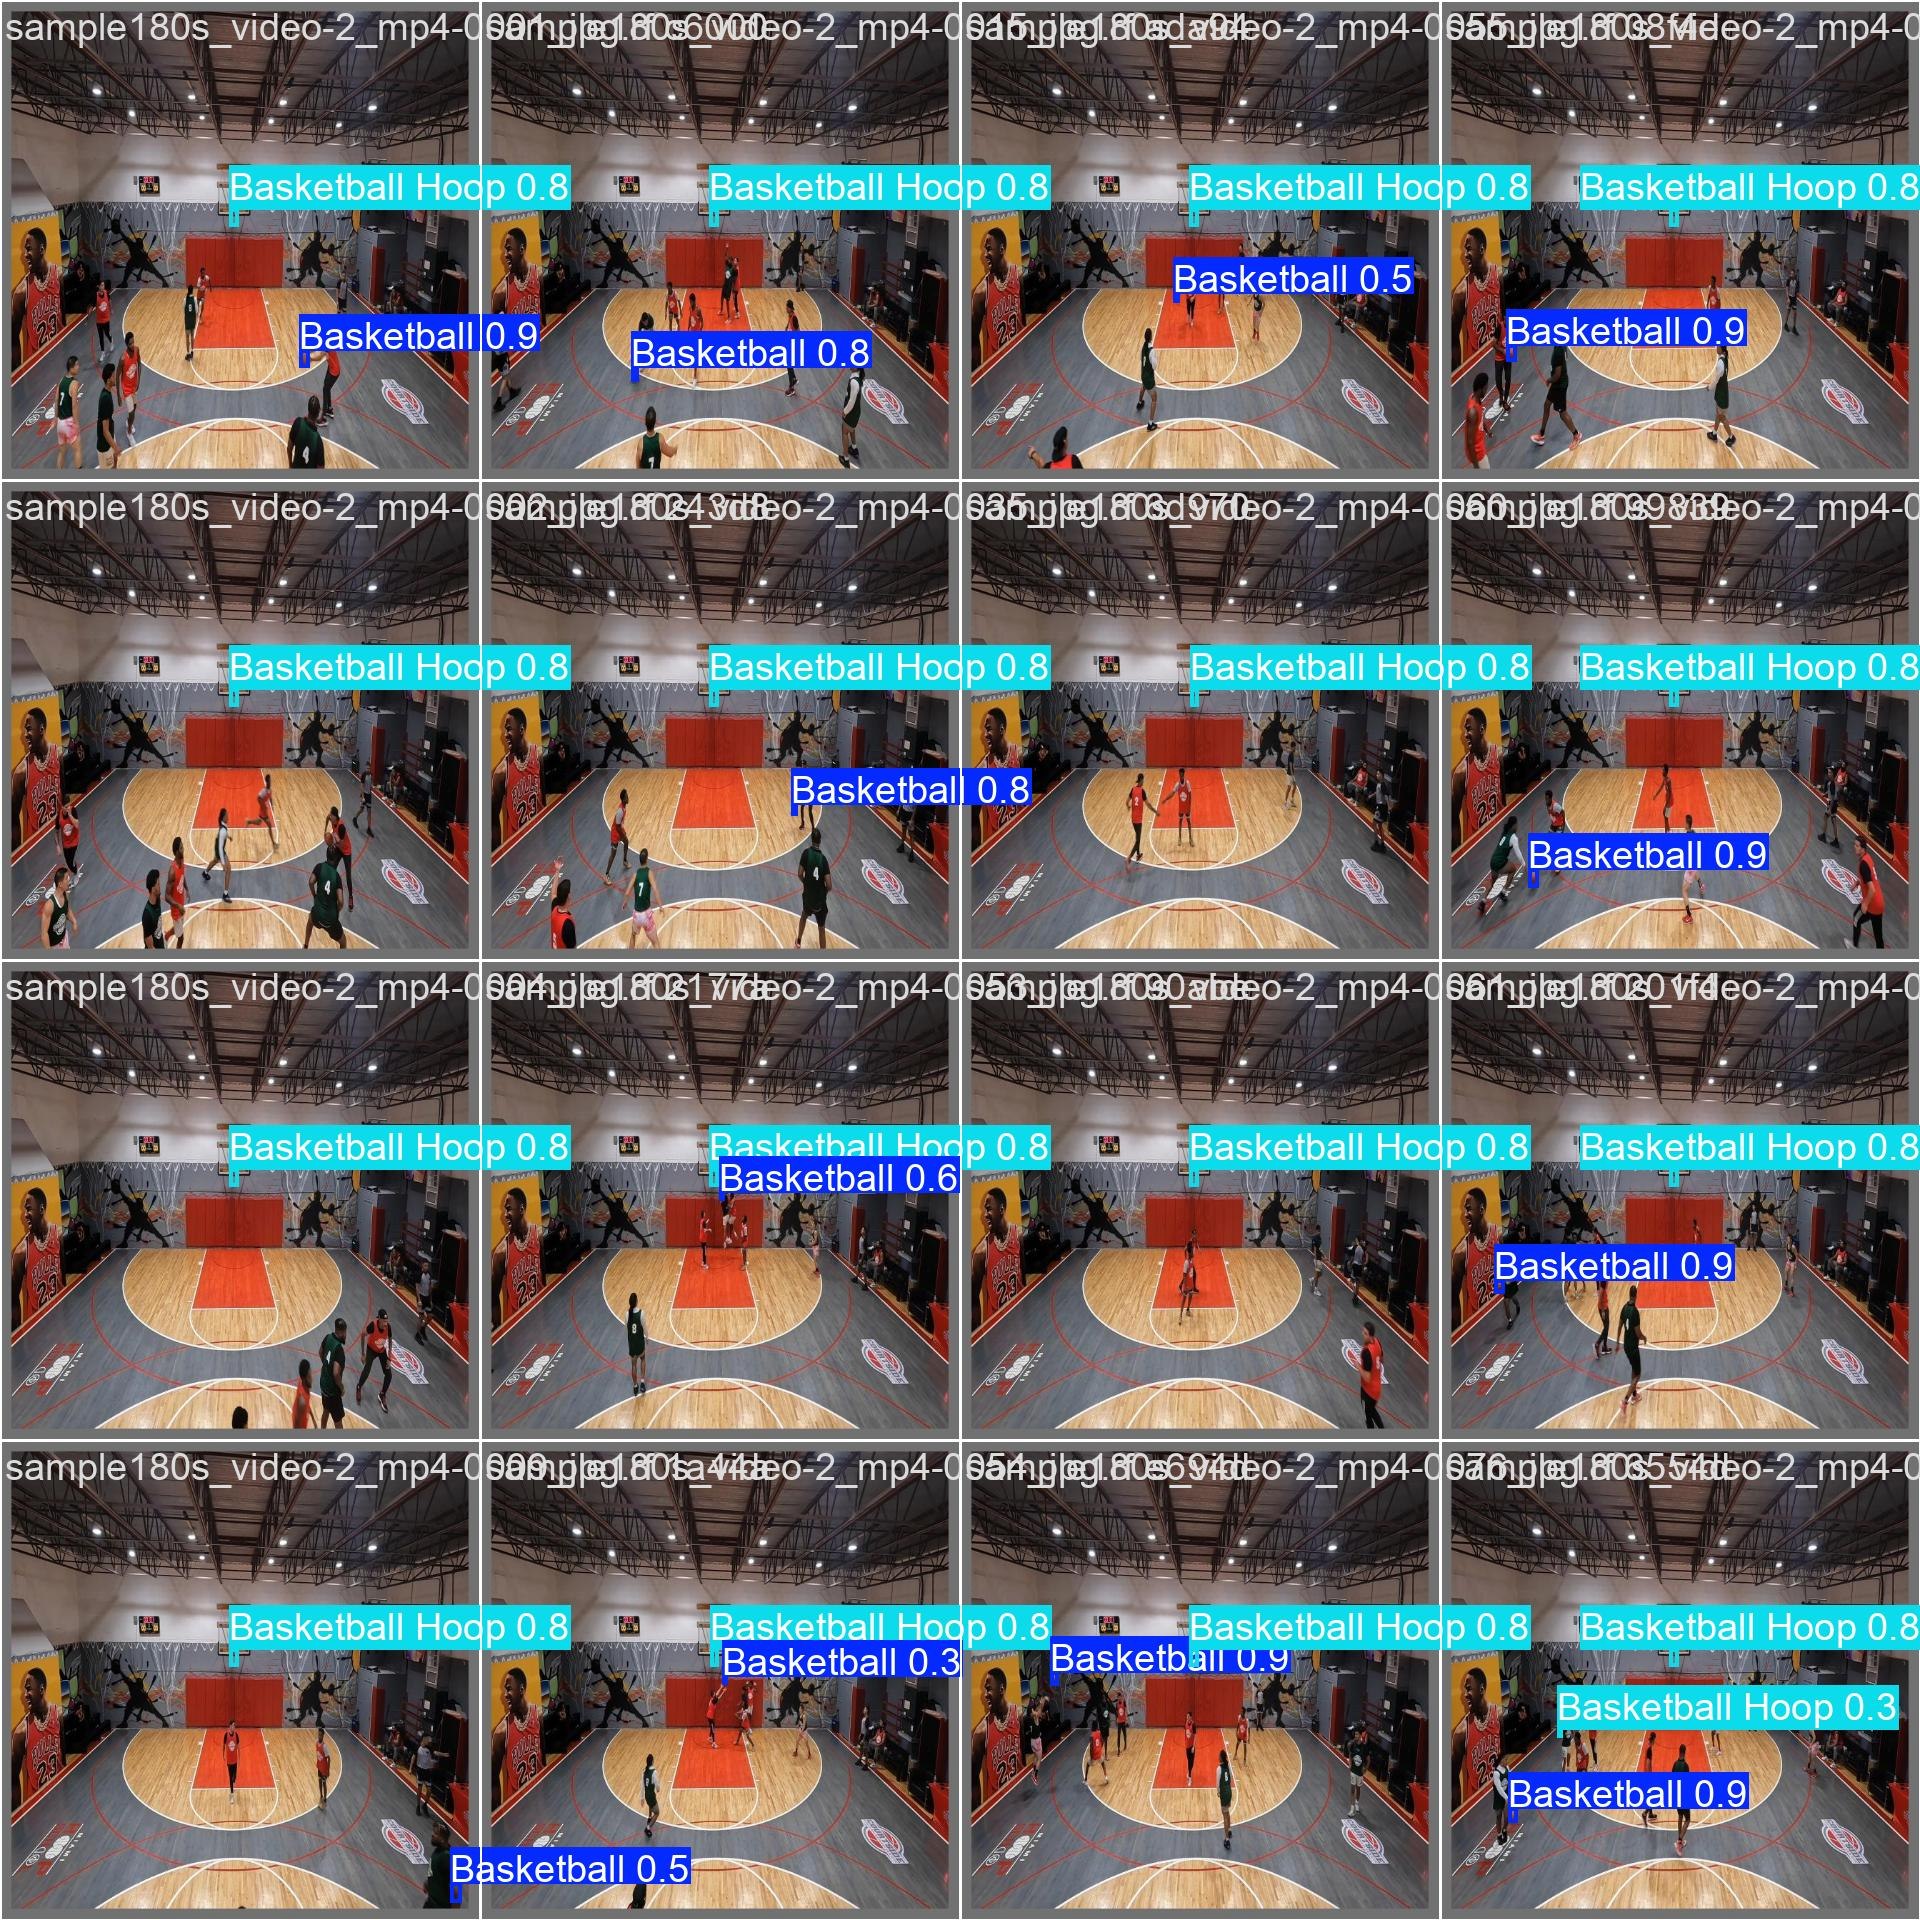


✅ Best model saved at: /content/basketball_training/run12/weights/best.pt
📁 All training files saved in: /content/basketball_training/run12/


In [9]:
# Display training results
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

# Path to training results
results_path = '/content/basketball_training/run12'

print("Training Results:")
print("=================")

# Display training curves
if os.path.exists(f'{results_path}/results.png'):
    print("\n📊 Training Curves:")
    display(Image(f'{results_path}/results.png'))

# Display confusion matrix
if os.path.exists(f'{results_path}/confusion_matrix.png'):
    print("\n🔍 Confusion Matrix:")
    display(Image(f'{results_path}/confusion_matrix.png'))

# Display validation predictions
if os.path.exists(f'{results_path}/val_batch0_pred.jpg'):
    print("\n🎯 Validation Predictions:")
    display(Image(f'{results_path}/val_batch0_pred.jpg'))

print(f"\n✅ Best model saved at: {results_path}/weights/best.pt")
print(f"📁 All training files saved in: {results_path}/")

## 6. Model Validation

In [ ]:
# Validate the trained model
print("Validating the trained model...")

# Load the best trained model
best_model = YOLO('/content/basketball_training/run12/weights/best.pt')

# Run validation
validation_results = best_model.val(
    data='/content/config.yaml',
    imgsz=640,
    batch=16,
    device=device
)

print("\n📈 Validation Metrics:")
print(f"mAP50: {validation_results.box.map50:.3f}")
print(f"mAP50-95: {validation_results.box.map:.3f}")
print(f"Precision: {validation_results.box.mp:.3f}")
print(f"Recall: {validation_results.box.mr:.3f}")

## 7. Test Inference

Testing inference on: sample180s_video-2_mp4-0130_jpg.rf.09f02a1b999655b50899c774dafdd14a.jpg

image 1/1 /content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/test/images/sample180s_video-2_mp4-0130_jpg.rf.09f02a1b999655b50899c774dafdd14a.jpg: 640x640 1 Basketball Hoop, 10.1ms
Speed: 2.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

🖼️ Original Image:


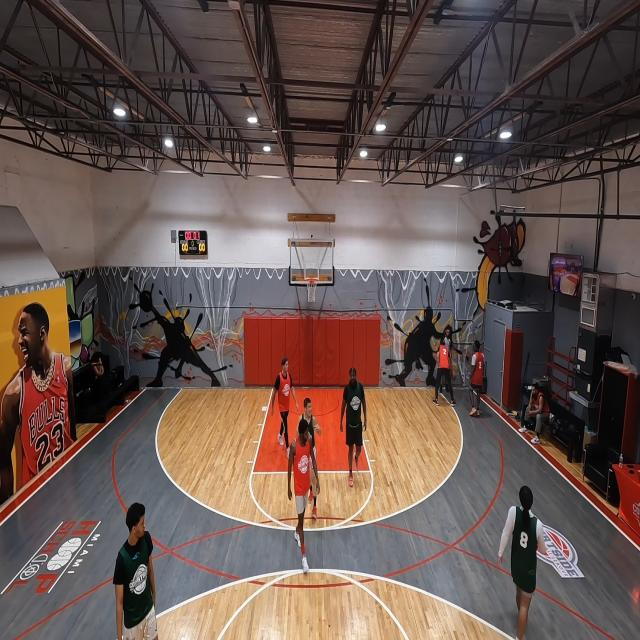


🎯 Detection Results:


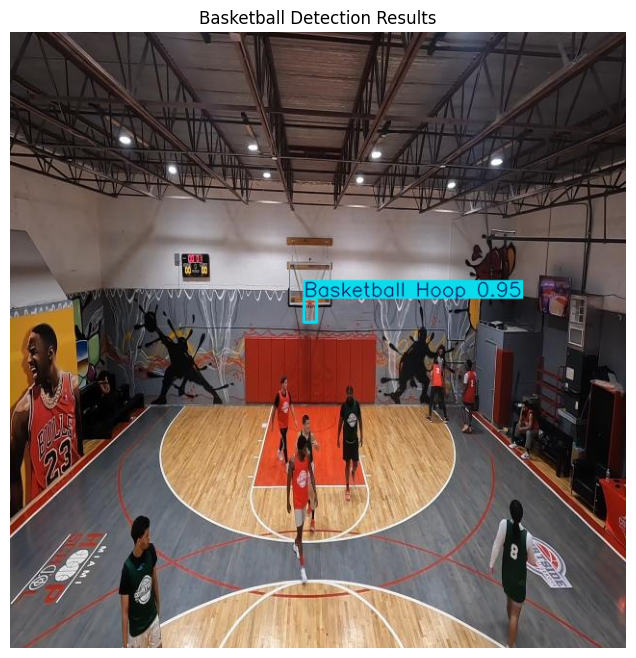


📋 Detection Summary:
Detection 1: Basketball Hoop (confidence: 0.950)


In [12]:
# Test inference on a single image
import cv2
import numpy as np
from PIL import Image as PILImage

# Get a test image path
test_images_path = '/content/drive/MyDrive/Uball-shot-detection.v2i.yolov11/test/images'
if os.path.exists(test_images_path):
    test_image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if test_image_files:
        # Use the first test image
        test_image_path = os.path.join(test_images_path, test_image_files[0])

        print(f"Testing inference on: {test_image_files[0]}")

        # Run inference
        results = best_model(test_image_path, conf=0.5)

        # Display original image
        print("\n🖼️ Original Image:")
        display(PILImage.open(test_image_path))

        # Display results
        print("\n🎯 Detection Results:")
        annotated_img = results[0].plot()

        # Convert BGR to RGB for display
        annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(annotated_img_rgb)
        plt.axis('off')
        plt.title('Basketball Detection Results')
        plt.show()

        # Print detection summary
        print("\n📋 Detection Summary:")
        if len(results[0].boxes) > 0:
            for i, box in enumerate(results[0].boxes):
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = ['Basketball', 'Basketball Hoop'][class_id]
                print(f"Detection {i+1}: {class_name} (confidence: {confidence:.3f})")
        else:
            print("No detections found.")
    else:
        print("No test images found.")
else:
    print("Test images directory not found.")

## 8. Download Trained Model

In [13]:
# Create a zip file with the trained model and results
import zipfile
import shutil

# Create zip file with trained model and results
zip_filename = '/content/basketball_model_trained.zip'

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add the best model
    zipf.write('/content/basketball_training/run12/weights/best.pt', 'best.pt')
    zipf.write('/content/basketball_training/run12/weights/last.pt', 'last.pt')

    # Add training results
    if os.path.exists('/content/basketball_training/run12/results.png'):
        zipf.write('/content/basketball_training/run12/results.png', 'results.png')

    if os.path.exists('/content/basketball_training/run12/confusion_matrix.png'):
        zipf.write('/content/basketball_training/run12/confusion_matrix.png', 'confusion_matrix.png')

    # Add configuration file
    zipf.write('/content/config.yaml', 'config.yaml')

print(f"✅ Training results packaged in: {zip_filename}")
print("\n📥 To download the file:")
print("1. Right-click on 'basketball_model_trained.zip' in the file browser")
print("2. Select 'Download'")
print("\n📁 The zip contains:")
print("- best.pt (best trained model)")
print("- last.pt (last epoch model)")
print("- results.png (training curves)")
print("- confusion_matrix.png (confusion matrix)")
print("- config.yaml (dataset configuration)")

# Also provide direct download link
from google.colab import files
print("\n⬇️ Downloading automatically...")
files.download(zip_filename)

✅ Training results packaged in: /content/basketball_model_trained.zip

📥 To download the file:
1. Right-click on 'basketball_model_trained.zip' in the file browser
2. Select 'Download'

📁 The zip contains:
- best.pt (best trained model)
- last.pt (last epoch model)
- results.png (training curves)
- confusion_matrix.png (confusion matrix)
- config.yaml (dataset configuration)

⬇️ Downloading automatically...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 9. Usage Instructions

After training is complete:

1. **Download the model**: The `best.pt` file is your trained model
2. **Use in your project**: Replace the model path in your `shot_detector.py` with the path to `best.pt`
3. **Model performance**: Check the validation metrics above to assess model quality

### Integration with your local project:

```python
# In your shot_detector.py, replace the model loading line with:
model = YOLO('path/to/your/downloaded/best.pt')
```

### Expected classes:
- 0: Green Team Player
- 1: Red Team Player
- 2: Rim
- 3: basketball

### Tips for better performance:
- If validation mAP is low, try training for more epochs
- Consider using a larger model (yolov8s.pt, yolov8m.pt) for better accuracy
- Ensure your dataset has good quality annotations
- Use data augmentation if you have limited training data